In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

In [ ]:
X, _ = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=1.2,
    random_state=42
)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    random_state=42
)

labels = kmeans.fit_predict(X_scaled)

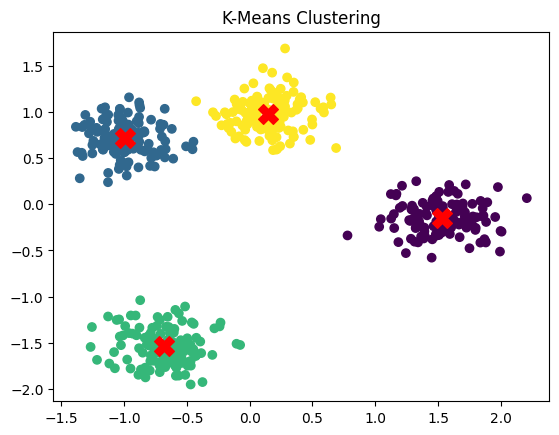

In [ ]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='viridis')
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    c='red', s=200, marker='X'
)
plt.title("K-Means Clustering")
plt.show()

In [ ]:
sil_score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.755747194151021


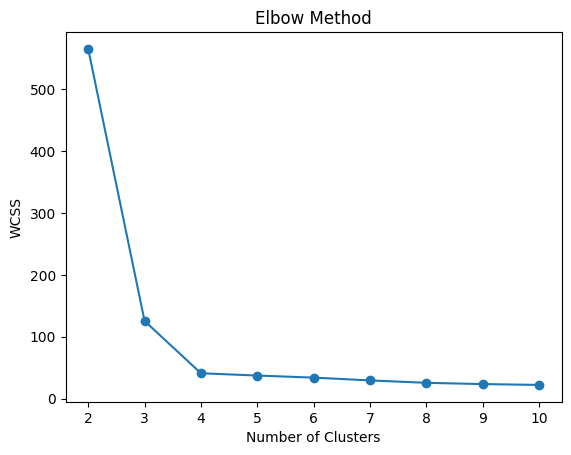

In [ ]:
wcss = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.plot(range(2,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()